## multi-modal, multi-label vit and cnn survival model 5-fold-CV result analysis

In [1]:
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
import lifelines

from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# Model prediction
data = pd.DataFrame()

for i in range(1,1+5):
    temp = pd.read_csv('Predictions_ViT{}.csv'.format(i))
    data = pd.concat([data, temp], ignore_index=True)
    
data = data.drop([data.columns[0]], axis=1)
data = data.sort_values(by=['ID']).reset_index(drop=True)
data

,ID,OS_risk,OS,Death,LFFS_risk,LFFS,LF,RFFS_risk,RFFS,RF,DFFS_risk,DFFS,DF
0,OPC-00001,14.988423,481,1,3.669844,481,0,2.751182,481,0,6.882381,481,0
1,OPC-00002,5.585012,3472,0,2.678481,3472,0,2.324451,3472,0,2.934763,3472,0
2,OPC-00004,4.349041,3274,0,1.761393,3274,0,1.472863,3274,0,1.709983,3274,0
3,OPC-00005,3.248554,3663,0,1.430695,3663,0,1.247972,3663,0,1.511627,3663,0
4,OPC-00008,12.743567,192,1,4.750291,39,1,3.898618,192,0,5.619485,189,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,OPC-00601,2.478722,3717,0,0.648746,3717,0,0.573150,3717,0,0.637211,3717,0
508,OPC-00602,8.155293,71,1,2.705130,71,0,2.215257,71,0,3.032011,71,0
509,OPC-00603,3.278542,3761,0,1.955276,3761,0,1.539500,3761,0,1.630437,1888,1
510,OPC-00604,17.307743,1618,1,6.485960,1618,0,3.072266,1618,0,4.180066,1618,0


In [3]:
clinic = pd.read_csv('Clinical_List.csv')
clinic

,ID,Age,Sex,ECOG,SMOKE1,SMOKE2,Drink,Subsite,T,N,...,Dose,Fraction,Death,Dig2Follow,LF,Dig2LF,RF,Dig2RF,DF,Dig2DF
0,OPC-00001,62.57,-1,0,50.0,0,2,7,5,4,...,60.0,25,1,481,0,481,0,481,0,481
1,OPC-00002,59.75,-1,0,0.0,-1,-2,0,5,0,...,64.0,40,0,3472,0,3472,0,3472,0,3472
2,OPC-00004,59.73,1,0,40.0,1,0,3,3,0,...,64.0,40,0,3274,0,3274,0,3274,0,3274
3,OPC-00005,68.72,1,0,40.0,0,-2,1,3,4,...,70.0,35,0,3663,0,3663,0,3663,0,3663
4,OPC-00008,63.54,-1,1,0.0,-1,-2,1,5,4,...,70.0,35,1,192,1,39,0,192,1,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,OPC-00601,56.45,1,0,60.0,1,2,6,1,0,...,51.0,20,0,3717,0,3717,0,3717,0,3717
508,OPC-00602,56.96,1,1,60.0,0,-2,2,3,0,...,54.4,34,1,71,0,71,0,71,0,71
509,OPC-00603,66.16,-1,1,0.0,-1,-2,1,4,0,...,70.0,35,0,3761,0,3761,0,3761,1,1888
510,OPC-00604,82.48,-1,1,50.0,0,2,3,2,0,...,51.0,20,1,1618,0,1618,0,1618,0,1618


In [4]:
data = data[clinic['HPV']==-1].reset_index(drop=True)
data

,ID,OS_risk,OS,Death,LFFS_risk,LFFS,LF,RFFS_risk,RFFS,RF,DFFS_risk,DFFS,DF
0,OPC-00001,14.988423,481,1,3.669844,481,0,2.751182,481,0,6.882381,481,0
1,OPC-00002,5.585012,3472,0,2.678481,3472,0,2.324451,3472,0,2.934763,3472,0
2,OPC-00019,13.296480,1510,1,4.382585,1510,0,2.500646,1510,0,2.816829,1510,0
3,OPC-00025,8.983223,148,1,4.293975,148,0,4.211913,68,1,3.714052,148,0
4,OPC-00027,4.736258,1978,1,1.578452,1978,0,1.377123,1978,0,1.619458,1978,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,OPC-00588,11.670746,227,1,4.556380,227,0,3.410524,227,0,5.291198,227,0
121,OPC-00593,1.520636,4535,0,1.025619,4535,0,0.914926,4535,0,0.995581,4535,0
122,OPC-00603,3.278542,3761,0,1.955276,3761,0,1.539500,3761,0,1.630437,1888,1
123,OPC-00604,17.307743,1618,1,6.485960,1618,0,3.072266,1618,0,4.180066,1618,0


In [5]:
data['OS_risk'].values

array([14.988423 ,  5.585012 , 13.29648  ,  8.983223 ,  4.7362585,
       11.311324 , 13.238201 ,  9.148571 ,  9.51657  ,  8.536146 ,
        8.409751 ,  4.554826 , 38.084797 ,  5.341728 , 24.718718 ,
        2.5928714, 18.31638  ,  8.94199  , 21.4534   ,  4.5033665,
       25.949062 ,  4.5207877, 11.72983  , 23.07401  , 12.557058 ,
       10.109003 ,  3.0822015, 30.716715 ,  9.896414 ,  7.720807 ,
        6.607889 ,  5.1213217,  3.9321585,  5.9864655, 14.104338 ,
        2.0701451,  5.8337293, 12.504098 , 10.207174 ,  4.5739098,
        9.483448 ,  4.6920986, 14.501183 , 32.800243 , 11.766682 ,
       28.191227 , 28.571663 , 16.640404 ,  8.7465515,  6.133069 ,
        7.4109726,  6.4595227, 20.271347 ,  9.124714 , 11.686279 ,
        7.8337994, 93.855995 , 11.233815 ,  5.0730276,  9.9068365,
        8.543409 ,  6.163353 , 12.751966 , 13.957138 , 21.071331 ,
        7.3171215, 16.2603   ,  7.1900563, 26.289734 , 21.964539 ,
        8.145501 , 13.645781 , 16.583317 ,  4.3051934, 41.4754

/tmp/ipykernel_2966689/919612695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650
/tmp/ipykernel_2966689/919612695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650


C-index is 0.692394684761097


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          25.60 <0.005     21.18

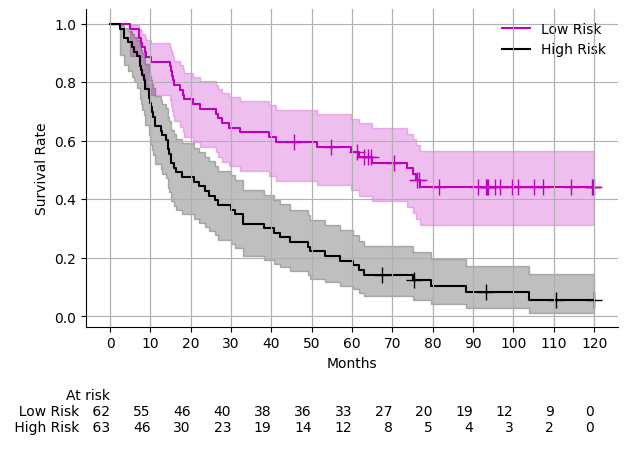

In [6]:
duration = data[['OS']]
duration[duration>3650]=3650
duration /= (365/12)
event = data[['Death']]

score = concordance_index(
                event_times=duration, 
                predicted_scores = -data['OS_risk'], 
                event_observed= event,
            )
print('C-index is', score)

high_risk_ind = np.argwhere(data['OS_risk'].values >= np.median(data['OS_risk']))
low_risk_ind = np.argwhere(data['OS_risk'].values < np.median(data['OS_risk']))

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_low = lifelines.KaplanMeierFitter()
ax = kmf_low.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="Low Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_high = lifelines.KaplanMeierFitter()
ax = kmf_high.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="High Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,13))
plt.grid()
plt.xlabel('Months')
plt.ylabel('Survival Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_low, kmf_high, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()

In [7]:
os_temp = data[['OS_risk', 'OS', 'Death']]
os_temp

,OS_risk,OS,Death
0,14.988423,481,1
1,5.585012,3472,0
2,13.296480,1510,1
3,8.983223,148,1
4,4.736258,1978,1
...,...,...,...
120,11.670746,227,1
121,1.520636,4535,0
122,3.278542,3761,0
123,17.307743,1618,1


In [8]:
from lifelines import CoxPHFitter
cph = CoxPHFitter() # sparse solutions,
cph.fit(os_temp, 'OS', 'Death')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 125 total observations, 34 right-censored observations>
             duration col = 'OS'
                event col = 'Death'
      baseline estimation = breslow
   number of observations = 125
number of events observed = 91
   partial log-likelihood = -377.07
         time fit was run = 2023-05-02 22:07:09 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
OS_risk     0.04       1.04       0.01             0.03             0.05                 1.03                 1.05

            cmp to    z      p   -log2(p)
covariate                                
OS_risk       0.00 6.42 <0.005      32.74
---
Concordance = 0.69
Partial AIC = 756.13
log-likelihood ratio test = 25.46 on 1 df
-log2(p) of ll-ratio test = 21.08

In [9]:
def CalAUC(data, risk, duration, event, title = "Patient Death Prediction"):
    ### AUC at 1, 3, 5 years for binary prediction (event vs no_event)
    temp = data[(data[duration]>=365)|((data[duration]<365)&(data[event]==1))]
    label = temp[duration]<=365
    print('number of patient: {}, number of event: {}'.format(len(label), len(temp[temp[duration]<=365])))
    fpr, tpr, thresholds = metrics.roc_curve(label.values, temp[risk], pos_label=1)
    auc = metrics.auc(fpr, tpr)

    #create ROC curve
    plt.plot(fpr,tpr, label="One-Year Event (AUC = {:.2f})".format(auc))

    #
    temp = data[(data[duration]>=365*3)|((data[duration]<365*3)&(data[event]==1))]
    label = temp[duration]<=365*3
    print('number of patient: {}, number of event: {}'.format(len(label), len(temp[temp[duration]<=365*3])))
    fpr, tpr, thresholds = metrics.roc_curve(label.values, temp[risk], pos_label=1)
    auc = metrics.auc(fpr, tpr)
    #create ROC curve
    plt.plot(fpr,tpr, label="Three-Year Event (AUC = {:.2f})".format(auc))

    #
    temp = data[(data[duration]>=365*5)|((data[duration]<365*5)&(data[event]==1))]
    label = temp[duration]<=365*5
    print('number of patient: {}, number of event: {}'.format(len(label), len(temp[temp[duration]<=365*5])))
    fpr, tpr, thresholds = metrics.roc_curve(label.values, temp[risk], pos_label=1)
    auc = metrics.auc(fpr, tpr)
    #create ROC curve
    plt.plot(fpr,tpr, label="Five-Year Event (AUC = {:.2f})".format(auc))

    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    # plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    # plt.show()
    
    # plt.savefig(title, dpi=300)

number of patient: 125, number of event: 30
number of patient: 125, number of event: 66
number of patient: 123, number of event: 78


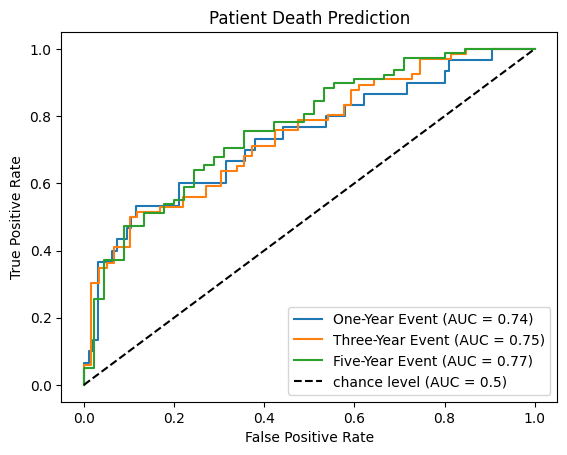

In [10]:
CalAUC(data[['OS_risk', 'OS', 'Death']], 'OS_risk', 'OS', 'Death')

In [11]:
def Cal_ConfidenceInterval(data, risk_name, duration_name, event_name, iteration=10000, alpha=0.95):
    stats = list()
    for i in range(iteration):
        data_sample = data.sample(frac=0.632, replace=True)
        try:
            stats.append(concordance_index(
                    event_times=data_sample[duration_name], 
                    predicted_scores = -data_sample[risk_name], 
                    event_observed= data_sample[event_name],
                ))
        except:
            continue
    plt.hist(stats)
    plt.show()
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(stats, p))
    print('%.1f confidence interval %.3f and %.3f' % (alpha*100, lower, upper))   
    
    return stats

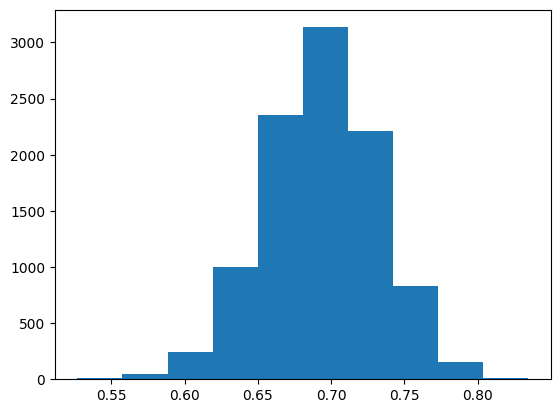

95.0 confidence interval 0.616 and 0.766


In [12]:
scores_OS = Cal_ConfidenceInterval(data[['OS_risk', 'OS', 'Death']], 'OS_risk', 'OS', 'Death')

In [13]:
np.median(scores_OS)

0.6936343907059803

C-index is 0.6657091561938959


/tmp/ipykernel_2966689/574357833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650
/tmp/ipykernel_2966689/574357833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.96 <0.005      8.50

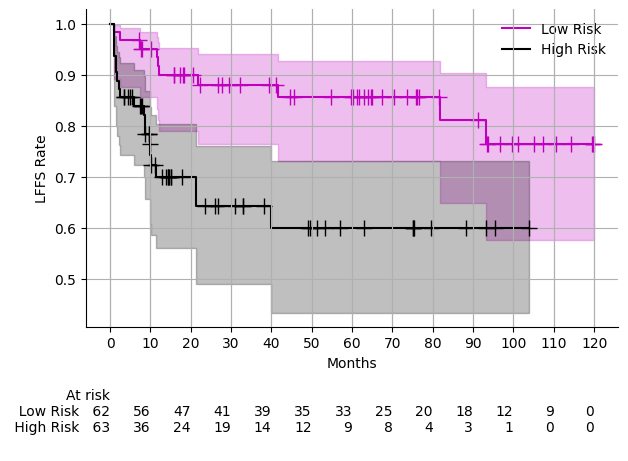

In [14]:
duration = data[['LFFS']]
duration[duration>3650]=3650
duration /= (365/12)
event = data[['LF']]


score = concordance_index(
                event_times=duration, 
                predicted_scores = -data['LFFS_risk'].values, 
                event_observed= event,
            )
print('C-index is', score)

high_risk_ind = np.argwhere(data['LFFS_risk'].values >= np.median(data['LFFS_risk']))
low_risk_ind = np.argwhere(data['LFFS_risk'].values < np.median(data['LFFS_risk']))

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_low = lifelines.KaplanMeierFitter()
ax = kmf_low.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="Low Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_high = lifelines.KaplanMeierFitter()
ax = kmf_high.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="High Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,13))
plt.grid()
plt.xlabel('Months')
plt.ylabel('LFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_low, kmf_high, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
# plt.savefig('ViT_LFFS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()

number of patient: 107, number of event: 22
number of patient: 82, number of event: 26
number of patient: 70, number of event: 28


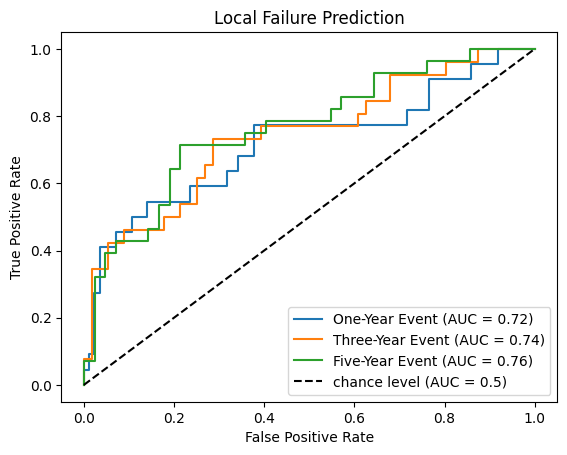

In [15]:
CalAUC(data[['LFFS_risk', 'LFFS', 'LF']], 'LFFS_risk', 'LFFS', 'LF',"Local Failure Prediction")

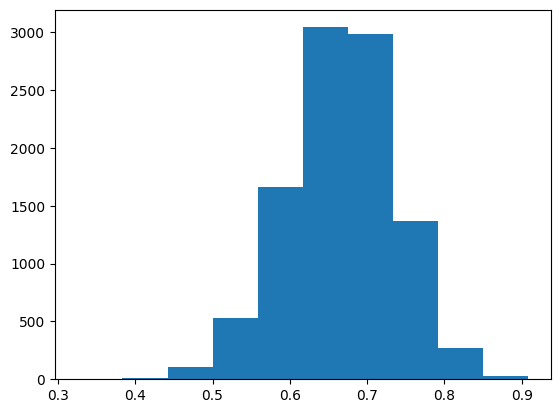

95.0 confidence interval 0.522 and 0.797


0.6684937007629582

In [16]:
score_LF = Cal_ConfidenceInterval(data[['LFFS_risk', 'LFFS', 'LF']], 'LFFS_risk', 'LFFS', 'LF')
np.median(score_LF)

C-index is 0.6766503667481663


/tmp/ipykernel_2966689/4163805120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650
/tmp/ipykernel_2966689/4163805120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.30 0.13      2.95

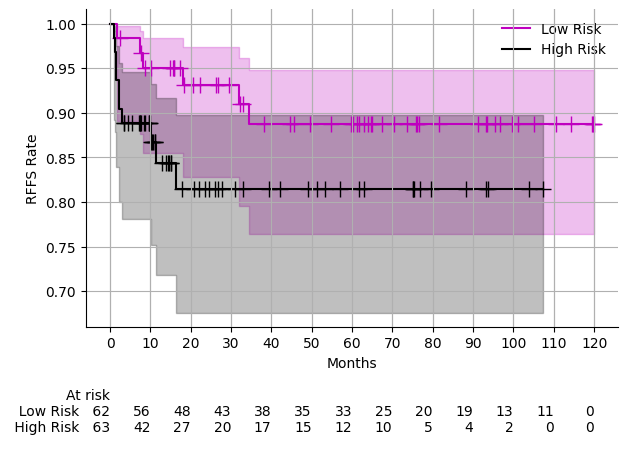

In [17]:
duration = data[['RFFS']]
duration[duration>3650]=3650
duration /= (365/12)
event = data[['RF']]

score = concordance_index(
                event_times=duration, 
                predicted_scores = -data['RFFS_risk'].values, 
                event_observed= event,
            )
print('C-index is', score)

high_risk_ind = np.argwhere(data['RFFS_risk'].values >= np.median(data['RFFS_risk']))
low_risk_ind = np.argwhere(data['RFFS_risk'].values < np.median(data['RFFS_risk']))

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_low = lifelines.KaplanMeierFitter()
ax = kmf_low.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="Low Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_high = lifelines.KaplanMeierFitter()
ax = kmf_high.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="High Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,13))
plt.grid()
plt.xlabel('Months')
plt.ylabel('RFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_low, kmf_high, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
# plt.savefig('ViT_RFFS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()

number of patient: 102, number of event: 12
number of patient: 73, number of event: 16
number of patient: 61, number of event: 16


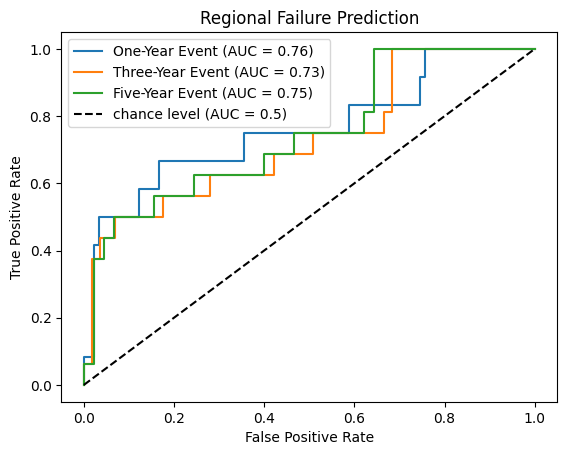

In [18]:
CalAUC(data[['RFFS_risk', 'RFFS', 'RF']], 'RFFS_risk', 'RFFS', 'RF',"Regional Failure Prediction")

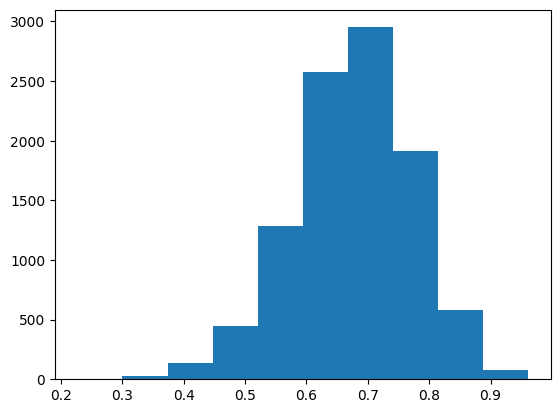

95.0 confidence interval 0.470 and 0.851


In [19]:
score_RF = Cal_ConfidenceInterval(data[['RFFS_risk', 'RFFS', 'RF']], 'RFFS_risk', 'RFFS', 'RF')

In [20]:
np.median(score_RF)

0.6802609008482927

C-index is 0.6591010235870048


/tmp/ipykernel_2966689/270501591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650
/tmp/ipykernel_2966689/270501591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3650]=3650


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.07 0.01      6.99

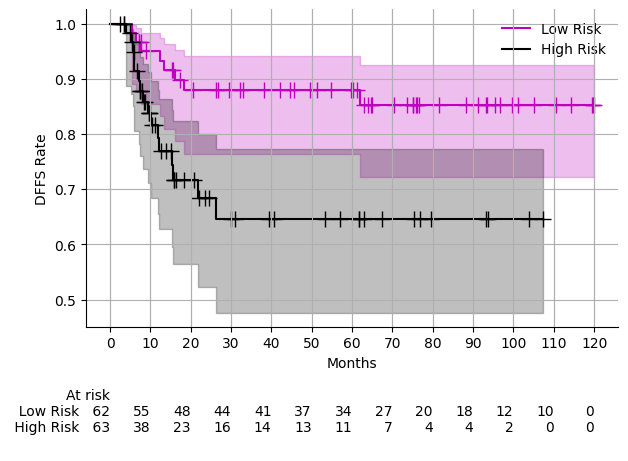

In [21]:
duration = data[['DFFS']]
duration[duration>3650]=3650
duration /= (365/12)
event = data[['DF']]

score = concordance_index(
                event_times=duration, 
                predicted_scores = -data['DFFS_risk'].values, 
                event_observed= event,
            )
print('C-index is', score)

high_risk_ind = np.argwhere(data['DFFS_risk'].values >= np.median(data['DFFS_risk']))
low_risk_ind = np.argwhere(data['DFFS_risk'].values < np.median(data['DFFS_risk']))

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_low = lifelines.KaplanMeierFitter()
ax = kmf_low.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="Low Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_high = lifelines.KaplanMeierFitter()
ax = kmf_high.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="High Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,13))
plt.grid()
plt.xlabel('Months')
plt.ylabel('DFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_low, kmf_high, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
# plt.savefig('ViT_DFS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()

number of patient: 103, number of event: 14
number of patient: 80, number of event: 23
number of patient: 68, number of event: 23


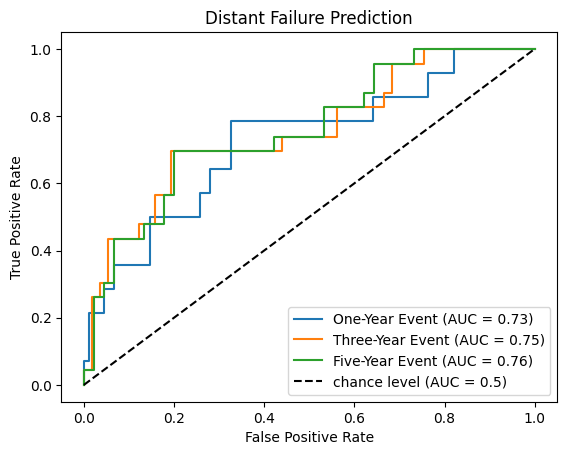

In [22]:
CalAUC(data[['DFFS_risk', 'DFFS', 'DF']], 'DFFS_risk', 'DFFS', 'DF',"Distant Failure Prediction")

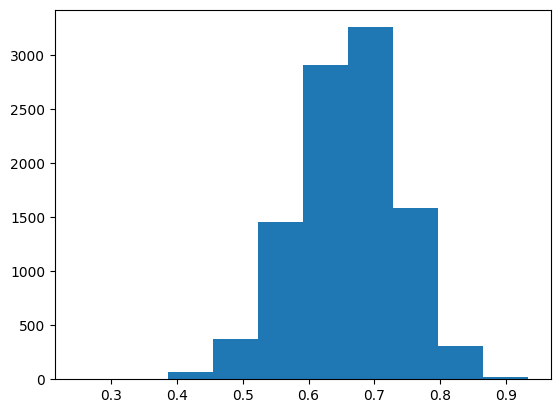

95.0 confidence interval 0.497 and 0.805


In [23]:
score_DF = Cal_ConfidenceInterval(data[['DFFS_risk', 'DFFS', 'DF']], 'DFFS_risk', 'DFFS', 'DF')

In [24]:
np.median(score_DF)

0.6629276394428576